In [4]:
import requests
import csv
import re
import pandas as pd
import json
from datetime import datetime as dt
from bs4 import BeautifulSoup
from matplotlib import pyplot as plt
import plotly
from IPython.display import display

alpha_vantage_key = "VOOUG4MWCSPELLUW"


In [5]:
INDEX_CACHE_FNAME = 'stock_indices_cache.json'

try:
    index_cache_file = open(INDEX_CACHE_FNAME,'r')
    index_cache_contents = index_cache_file.read()
    index_cache_file.close()
    INDEX_CACHE_DICTION = json.loads(index_cache_contents)
except:
    INDEX_CACHE_DICTION = {}
    symbol_list=['SPX','DJIA','NDX', 'HUI', 'VIX']
    for symbol in symbol_list:
        struct = {}
        params = {'function': 'TIME_SERIES_DAILY', 'symbol': '{}'.format(symbol), 'outputsize':'full', 'apikey':alpha_vantage_key}
        res = requests.get('https://www.alphavantage.co/query', params=params)
        s_p_data = json.loads(res.text)
        sorted_times = list(reversed(list(s_p_data["Time Series (Daily)"].keys())))
        for x in sorted_times:
            if dt.strptime(x, "%Y-%m-%d") < dt.strptime('2013-12-27',"%Y-%m-%d"):
                continue
            price = s_p_data["Time Series (Daily)"][x]
            struct[x] = price
        INDEX_CACHE_DICTION[symbol] = struct
        index_cache_file = open(INDEX_CACHE_FNAME, 'w')
        index_cache_file.write(json.dumps(INDEX_CACHE_DICTION))
    index_cache_file.close()
    index_cache_file = open(INDEX_CACHE_FNAME,'r')
    index_cache_contents = index_cache_file.read()
    index_cache_file.close()     
    INDEX_CACHE_DICTION = json.loads(index_cache_contents)




    


  
        

In [6]:
CRYPTO_CACHE_FNAME = 'crypto_cache.json'


month_mapping = {'Jan': '01', 'Feb': '02', 'Mar': '03', 'Apr': '04', 'May': '05', 'Jun': '06', 'Jul': '07',
                'Aug': '08', 'Sep': '09', 'Oct': '10', 'Nov': '11', 'Dec': '12'}

try:
    crypto_cache_file = open(CRYPTO_CACHE_FNAME,'r')
    crypto_cache_contents = crypto_cache_file.read()
    crypto_cache_file.close()
    CRYPTO_CACHE_DICTION = json.loads(crypto_cache_contents)
except:
    
    CRYPTO_CACHE_DICTION = {}
    cryptos = ['bitcoin','ethereum','ripple','litecoin']
    crypto_cache_file = open(CRYPTO_CACHE_FNAME, 'w')
    for currency in cryptos:
        currency_list = []
        crypto_res = requests.get('https://coinmarketcap.com/currencies/{}/historical-data/?start=20130428&end=20180409'.format(currency))
        soup = BeautifulSoup(crypto_res.text,'html.parser')
        rows = soup.find_all('tr', class_='text-right')
        for row in rows:
            table_data = row.find_all('td')
            if table_data[0].text == 'Dec 26, 2013':
                break

            full_date = table_data[0].text.strip()
            if full_date[:3] in month_mapping:
                crypto_date = full_date[-4:] + "-" + month_mapping[full_date[:3]] + "-" + full_date[4:6]
            if crypto_date not in INDEX_CACHE_DICTION['SPX'] or crypto_date not in INDEX_CACHE_DICTION['DJIA'] or crypto_date not in INDEX_CACHE_DICTION['NDX'] or crypto_date not in INDEX_CACHE_DICTION['VIX'] or crypto_date not in INDEX_CACHE_DICTION['HUI']:
                continue
            date_price = (crypto_date, float(table_data[4].text), int(table_data[5].text.replace(",","")))
            currency_list.append(date_price)
        CRYPTO_CACHE_DICTION[currency] = list(reversed(currency_list))
    crypto_cache_file.write(json.dumps(CRYPTO_CACHE_DICTION))
    crypto_cache_file.close()
    crypto_cache_file = open(CRYPTO_CACHE_FNAME,'r')
    crypto_cache_contents = crypto_cache_file.read()
    crypto_cache_file.close()     
    CRYPTO_CACHE_DICTION = json.loads(crypto_cache_contents)


        
    
    

In [7]:
import plotly.graph_objs as go
import plotly.plotly as py


trace0 = go.Scatter(
    x = [x[0] for x in CRYPTO_CACHE_DICTION['bitcoin']],
    y = [x[1] for x in CRYPTO_CACHE_DICTION['bitcoin']],
    name = 'Bitcoin',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4)
)
trace1 = go.Scatter(
    x = [x[0] for x in CRYPTO_CACHE_DICTION['ripple']],
    y = [x[1] for x in CRYPTO_CACHE_DICTION['ripple']],
    name = 'Ripple',
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,)
)
trace2 = go.Scatter(
    x = [x[0] for x in CRYPTO_CACHE_DICTION['ethereum']],
    y = [x[1] for x in CRYPTO_CACHE_DICTION['ethereum']],
    name = 'Ethereum',
    line = dict(
        color = ('rgb(100, 100, 180)'),
        width = 4)
)

trace3 = go.Scatter(
    x = [x[0] for x in CRYPTO_CACHE_DICTION['litecoin']],
    y = [x[1] for x in CRYPTO_CACHE_DICTION['litecoin']],
    name = 'Litecoin',
    line = dict(
        color = ('rgb(100, 12, 24)'),
        width = 4) 
)

data = [trace0, trace1, trace2, trace3]

# Edit the layout
layout = dict(title = 'Cryptocurrency prices',
              xaxis = dict(title = 'Time'),
              yaxis = dict(title = 'Price'),
              )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-line')

In [8]:
import plotly.graph_objs as go
import plotly.plotly as py


s_ind0 = go.Scatter(
    x = [x for x in INDEX_CACHE_DICTION['SPX'].keys()],
    y = [float(x['4. close']) for x in INDEX_CACHE_DICTION['SPX'].values()],
    name = 'S&P 500',
    line = dict(
        color = ('rgb(50, 220, 160)'),
        width = 4)
)

s_ind1 = go.Scatter(
    x = [x for x in INDEX_CACHE_DICTION['DJIA'].keys()],
    y = [float(x['4. close']) for x in INDEX_CACHE_DICTION['DJIA'].values()],
    name = 'Dow Jones',
    line = dict(
        color = ('rgb(180, 45, 40)'),
        width = 4,)
)

s_ind2 = go.Scatter(
    x = [x for x in INDEX_CACHE_DICTION['NDX'].keys()],
    y = [float(x['4. close']) for x in INDEX_CACHE_DICTION['NDX'].values()],
    name = 'Nasdaq Composite',
    line = dict(
        color = ('rgb(30, 220, 50)'),
        width = 4)
)


data = [s_ind0, s_ind1, s_ind2]

# Edit the layout
layout = dict(title = 'Major Stock Indices',
              xaxis = dict(title = 'Time'),
              yaxis = dict(title = 'Price')
              )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-line')
    
    
    

Correlation coefficient: 0.8


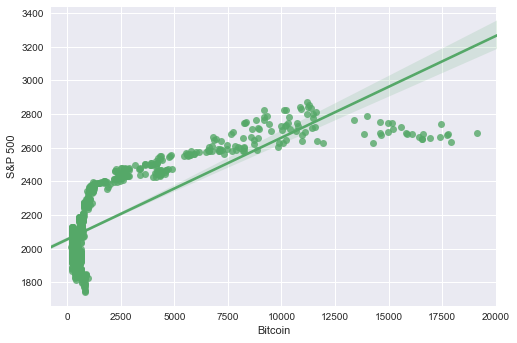

In [9]:
import seaborn as sns 
sns.set(color_codes=True)
import pandas as pd
from scipy.stats.stats import pearsonr

#BITCOIN VS S&P
bit_index = [x[0] for x in CRYPTO_CACHE_DICTION['bitcoin']]
bit_data = [x[1] for x in CRYPTO_CACHE_DICTION['bitcoin']]
sp_data = [float(INDEX_CACHE_DICTION['SPX'][x]['4. close']) for x in INDEX_CACHE_DICTION['SPX'] if x in bit_index]
r_value = pearsonr(bit_data, sp_data)

bit_series = pd.Series(bit_data,index=[x[0] for x in CRYPTO_CACHE_DICTION['bitcoin']], name="Bitcoin")
sp_series = pd.Series(sp_data,index= bit_series.index, name="S&P 500")

bitcoin_sp_reg = sns.regplot(x= bit_series, y= sp_series, color='g')
print("Correlation coefficient: " + str(round(r_value[0],2)))
plt.show()


Correlation coefficient: 0.84


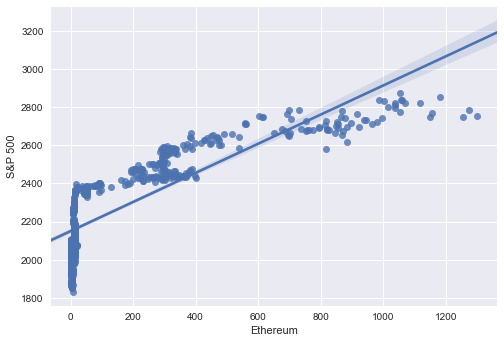

In [10]:
#ETHEREUM VS S&P

eth_index = [x[0] for x in CRYPTO_CACHE_DICTION['ethereum']]
eth_data = [x[1] for x in CRYPTO_CACHE_DICTION['ethereum']]
sp_data = [float(INDEX_CACHE_DICTION['SPX'][x]['4. close']) for x in INDEX_CACHE_DICTION['SPX'] if x in eth_index]
r_value = pearsonr(eth_data, sp_data)

eth_series = pd.Series(eth_data, index=[x[0] for x in CRYPTO_CACHE_DICTION['ethereum']], name="Ethereum")
sp_series = pd.Series(sp_data,index= eth_series.index, name="S&P 500")


eth_sp_reg = sns.regplot(x= eth_series, y= sp_series, color='b')
print("Correlation coefficient: " + str(round(r_value[0],2)))
plt.show()

Correlation coefficient: 0.67


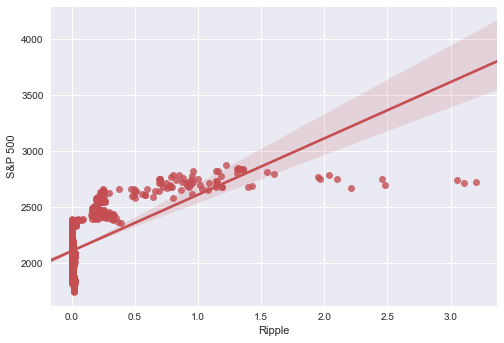

In [11]:
#RIPPLE VS S&P
rip_index = [x[0] for x in CRYPTO_CACHE_DICTION['ripple']]
rip_data = [x[1] for x in CRYPTO_CACHE_DICTION['ripple']]
sp_data = [float(INDEX_CACHE_DICTION['SPX'][x]['4. close']) for x in INDEX_CACHE_DICTION['SPX'] if x in rip_index]
r_value = pearsonr(rip_data, sp_data)

rip_series = pd.Series(rip_data,index=[x[0] for x in CRYPTO_CACHE_DICTION['ripple']], name="Ripple")
sp_series = pd.Series(sp_data,index= rip_series.index, name="S&P 500")



rip_sp_reg = sns.regplot(x= rip_series, y= sp_series, color='r')
print("Correlation coefficient: " + str(round(r_value[0],2)))
plt.show()

Correlation coefficient: 0.73


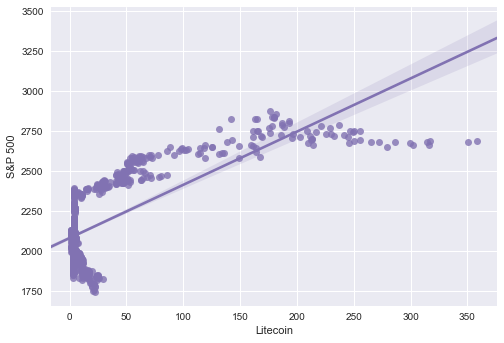

In [12]:
#LITECOIN VS S&P
lit_index = [x[0] for x in CRYPTO_CACHE_DICTION['litecoin']]
lit_data = [x[1] for x in CRYPTO_CACHE_DICTION['litecoin']]
sp_data = [float(INDEX_CACHE_DICTION['SPX'][x]['4. close']) for x in INDEX_CACHE_DICTION['SPX'] if x in lit_index]
r_value = pearsonr(lit_data, sp_data)


lit_series = pd.Series(lit_data, index=[x[0] for x in CRYPTO_CACHE_DICTION['litecoin']], name="Litecoin")
sp_series = pd.Series(sp_data,index= lit_series.index, name="S&P 500")

lit_sp_reg = sns.regplot(x= lit_series, y= sp_series, color='m')
print("Correlation coefficient: " + str(round(r_value[0],2)))
plt.show()

Correlation coefficient: 0.84


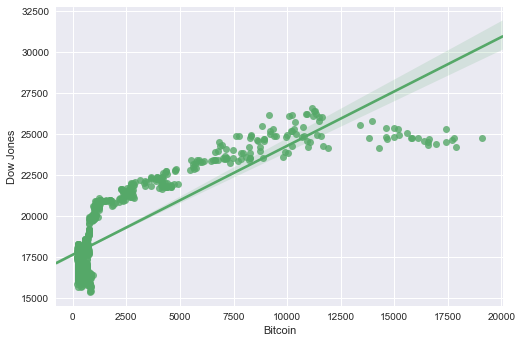

In [13]:
#BITCOIN VS DOW JONES


dj_data = [float(INDEX_CACHE_DICTION['DJIA'][x]['4. close']) for x in INDEX_CACHE_DICTION['DJIA'] if x in bit_series.index]
r_value = pearsonr(bit_data, dj_data)

dj_series = pd.Series(dj_data,index= bit_series.index, name="Dow Jones")


bitcoin_dj_reg = sns.regplot(x= bit_series, y= dj_series, color='g')
print("Correlation coefficient: " + str(round(r_value[0],2)))
plt.show()

Correlation coefficient: 0.86


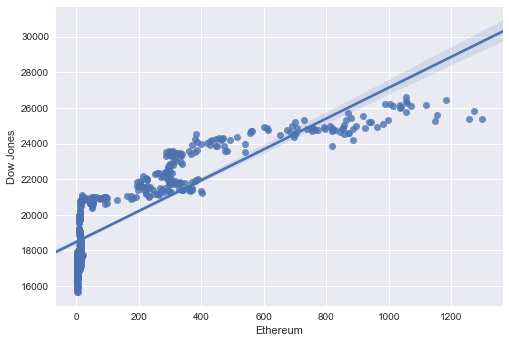

In [14]:
#ETHEREUM VS DOW JONES


dj_data = [float(INDEX_CACHE_DICTION['DJIA'][x]['4. close']) for x in INDEX_CACHE_DICTION['DJIA'] if x in eth_series.index]
r_value = pearsonr(eth_data, dj_data)

dj_series = pd.Series(dj_data,index= eth_series.index, name="Dow Jones")

eth_dj_reg = sns.regplot(x= eth_series, y= dj_series, color='b')
print("Correlation coefficient: " + str(round(r_value[0],2)))
plt.show()

Correlation coefficient: 0.71


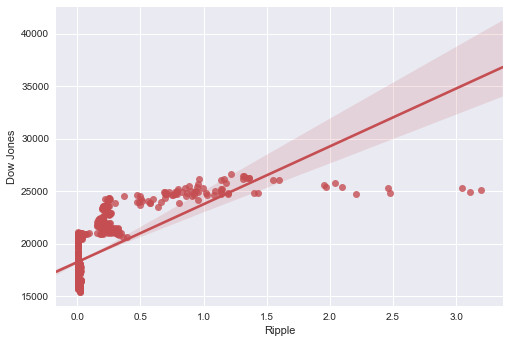

In [15]:
#RIPPLE VS DOW JONES

dj_data = [float(INDEX_CACHE_DICTION['DJIA'][x]['4. close']) for x in INDEX_CACHE_DICTION['DJIA'] if x in rip_series.index]
r_value = pearsonr(rip_data, dj_data)


dj_series = pd.Series(dj_data,index= rip_series.index, name="Dow Jones")


rip_dj_reg = sns.regplot(x= rip_series, y= dj_series, color='r')
print("Correlation coefficient: " + str(round(r_value[0],2)))
plt.show()

Correlation coefficient: 0.78


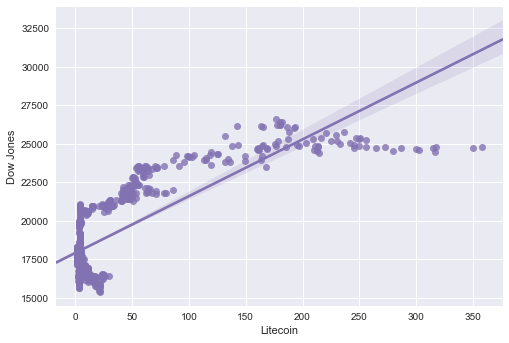

In [16]:
#LITECOIN VS DOW JONES

dj_data = [float(INDEX_CACHE_DICTION['DJIA'][x]['4. close']) for x in INDEX_CACHE_DICTION['DJIA'] if x in lit_series.index]
r_value = pearsonr(lit_data, dj_data)


dj_series = pd.Series(dj_data, index= lit_series.index, name="Dow Jones")


lit_dj_reg = sns.regplot(x= lit_series, y= dj_series, color='m')
print("Correlation coefficient: " + str(round(r_value[0],2)))
plt.show()

Correlation coefficient: 0.79


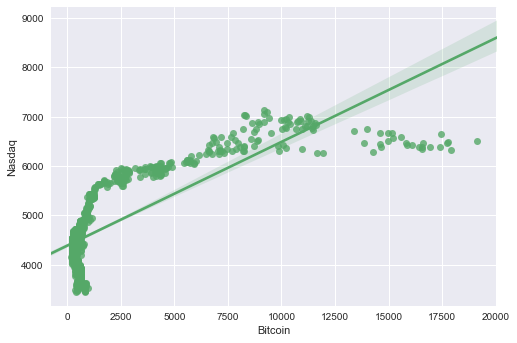

In [17]:
#BITCOIN VS NASDAQ
nd_data = [float(INDEX_CACHE_DICTION['NDX'][x]['4. close']) for x in INDEX_CACHE_DICTION['NDX'] if x in bit_series.index]
r_value = pearsonr(bit_data, nd_data)

nd_series = pd.Series(nd_data,index= bit_series.index, name="Nasdaq")

bitcoin_nd_reg = sns.regplot(x= bit_series, y = nd_series, color='g')
print("Correlation coefficient: " + str(round(r_value[0],2)))
plt.show()

Correlation coefficient: 0.85


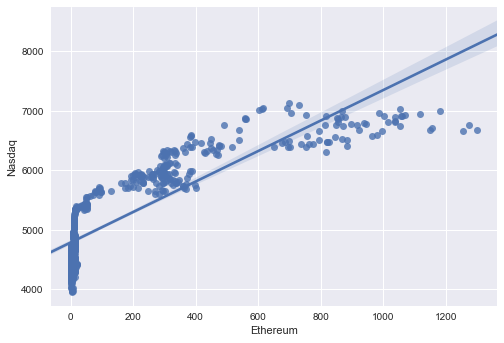

In [18]:
#ETHEREUM VS NASDAQ

nd_data = [float(INDEX_CACHE_DICTION['NDX'][x]['4. close']) for x in INDEX_CACHE_DICTION['NDX'] if x in eth_series.index]
r_value = pearsonr(eth_data, nd_data)


nd_series = pd.Series(nd_data,index= eth_series.index, name="Nasdaq")

eth_nd_reg = sns.regplot(x= eth_series, y= nd_series, color='b')
print("Correlation coefficient: " + str(round(r_value[0],2)))
plt.show()

Correlation coefficient: 0.66


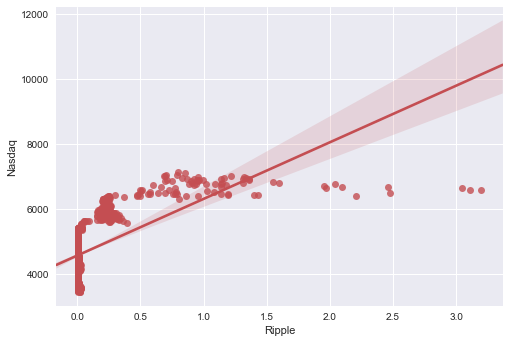

In [19]:
#RIPPLE VS NASDAQ

nd_data = [float(INDEX_CACHE_DICTION['NDX'][x]['4. close']) for x in INDEX_CACHE_DICTION['NDX'] if x in rip_series.index]
r_value = pearsonr(rip_data, nd_data)

nd_series = pd.Series(nd_data,index= rip_series.index, name="Nasdaq")


rip_nd_reg = sns.regplot(x= rip_series, y= nd_series, color='r')
print("Correlation coefficient: " + str(round(r_value[0],2)))
plt.show()

Correlation coefficient: 0.72


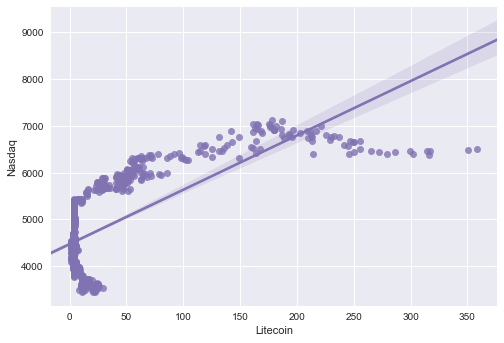

In [20]:
#LITECOIN VS NASDAQ

nd_data = [float(INDEX_CACHE_DICTION['NDX'][x]['4. close']) for x in INDEX_CACHE_DICTION['NDX'] if x in lit_series.index]
r_value = pearsonr(lit_data, nd_data)


nd_series = pd.Series(nd_data, index= lit_series.index, name="Nasdaq")


lit_nd_reg = sns.regplot(x= lit_series, y= nd_series, color='m')
print("Correlation coefficient: " + str(round(r_value[0],2)))
plt.show()

Correlation coefficient: -0.32


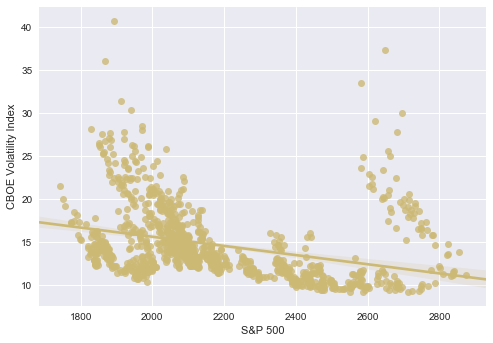

In [21]:
#VOLATILITY INDEX VS S&P

vix_index = [x for x in INDEX_CACHE_DICTION['VIX'].keys() if x in INDEX_CACHE_DICTION['SPX'].keys()]
vix_data = [float(INDEX_CACHE_DICTION['VIX'][x]['4. close']) for x in INDEX_CACHE_DICTION['VIX']]
sp_data = [float(INDEX_CACHE_DICTION['SPX'][x]['4. close']) for x in INDEX_CACHE_DICTION['SPX'] if x in vix_index]
r_value = pearsonr(vix_data, sp_data)

vix_series = pd.Series(vix_data,index=[x for x in INDEX_CACHE_DICTION['VIX'].keys() if x in INDEX_CACHE_DICTION['SPX'].keys()], name="CBOE Volatility Index")
sp_series = pd.Series(sp_data,index= vix_series.index, name="S&P 500")



vix_sp_reg = sns.regplot(x= sp_series, y= vix_series, color='y')
print("Correlation coefficient: " + str(round(r_value[0],2)))
plt.show()

Correlation coefficient: -0.17


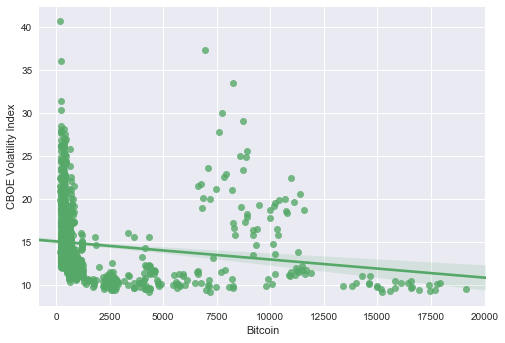

In [22]:
#VOLATILITY INDEX VS BITCOIN

bitcoin_dates = [x[0] for x in CRYPTO_CACHE_DICTION['bitcoin']]
vix_data = [float(INDEX_CACHE_DICTION['VIX'][x]['4. close']) for x in INDEX_CACHE_DICTION['VIX'] if x in bitcoin_dates]
vix_series = pd.Series(vix_data,index=bit_series.index, name="CBOE Volatility Index")

r_value = pearsonr(vix_data, bit_data)
vix_bit_reg = sns.regplot(x= bit_series, y= vix_series, color='g')
print("Correlation coefficient: " + str(round(r_value[0],2)))
plt.show()

Correlation coefficient: -0.14


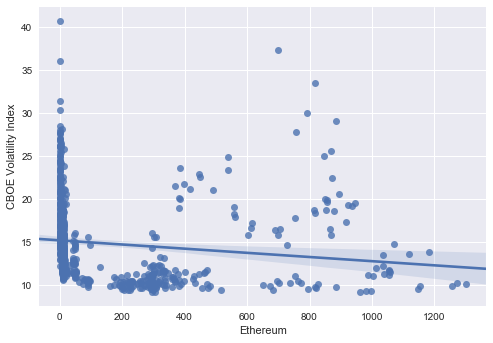

In [23]:
#VOLATILITY INDEX VS ETHEREUM


eth_dates = [x[0] for x in CRYPTO_CACHE_DICTION['ethereum']]
vix_data = [float(INDEX_CACHE_DICTION['VIX'][x]['4. close']) for x in INDEX_CACHE_DICTION['VIX'] if x in eth_dates]
vix_series = pd.Series(vix_data,index=eth_series.index, name="CBOE Volatility Index")

r_value = pearsonr(vix_data, eth_data)
vix_eth_reg = sns.regplot(x= eth_series, y= vix_series, color='b')
print("Correlation coefficient: " + str(round(r_value[0],2)))
plt.show()

Correlation coefficient: -0.09


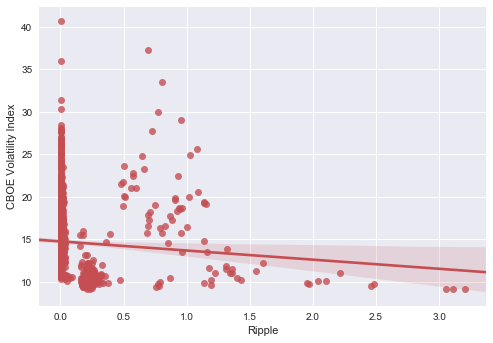

In [24]:
#VOLATILITY INDEX VS RIPPLE

rip_dates = [x[0] for x in CRYPTO_CACHE_DICTION['ripple']]
vix_data = [float(INDEX_CACHE_DICTION['VIX'][x]['4. close']) for x in INDEX_CACHE_DICTION['VIX'] if x in rip_dates]
vix_series = pd.Series(vix_data,index=rip_series.index, name="CBOE Volatility Index")

r_value = pearsonr(vix_data, rip_data)
vix_rip_reg = sns.regplot(x= rip_series, y= vix_series, color='r')
print("Correlation coefficient: " + str(round(r_value[0],2)))
plt.show()

Correlation coefficient: -0.09


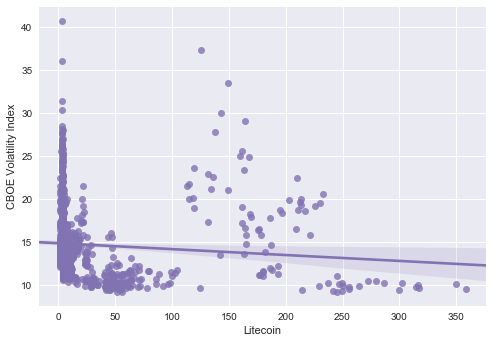

In [25]:
#VOLATILITY VS LITECOIN

lit_dates = [x[0] for x in CRYPTO_CACHE_DICTION['litecoin']]
vix_data = [float(INDEX_CACHE_DICTION['VIX'][x]['4. close']) for x in INDEX_CACHE_DICTION['VIX'] if x in lit_dates]

vix_series = pd.Series(vix_data,index=lit_series.index, name="CBOE Volatility Index")


r_value = pearsonr(vix_data, lit_data)
vix_sp_reg = sns.regplot(x= lit_series, y= vix_series, color='m')
print("Correlation coefficient: " + str(round(r_value[0],2)))
plt.show()

Correlation coefficient: 0.24


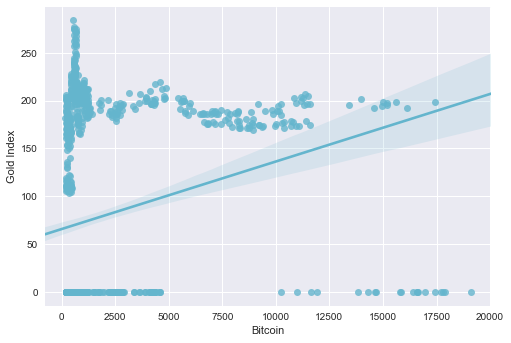

In [26]:
#Gold index vs Bitcoin

gold_data = [float(INDEX_CACHE_DICTION['HUI'][x]['4. close']) for x in INDEX_CACHE_DICTION['HUI'] if x in bit_series.index]
r_value = pearsonr(bit_data, gold_data)

gold_series = pd.Series(gold_data,index= bit_series.index, name="Gold Index")


bitcoin_gold_reg = sns.regplot(x= bit_series, y= gold_series, color='c')
print("Correlation coefficient: " + str(round(r_value[0],2)))
plt.show()



In [28]:
#S&P 500 and Bitcoin Price Changes

sp_dates = [x[0] for x in INDEX_CACHE_DICTION['SPX'].items()]
sp_change = [round((float(INDEX_CACHE_DICTION['SPX'][sp_dates[x]]['4. close']) - float(INDEX_CACHE_DICTION['SPX'][sp_dates[x + 1]]['4. close']))/float(INDEX_CACHE_DICTION['SPX'][sp_dates[x + 1]]['4. close']),2) for x 
             in range(len(sp_dates) - 1) if list(INDEX_CACHE_DICTION['SPX'].items())[x][0] in bit_index]
sorted_sp_changes_high = sorted(sp_change, reverse=True)[:10]
sorted_sp_changes_low = sorted(sp_change)[:10]
print("S&P 500")
print("Most extreme day to day changes in S&P 500 price as percentage of whole price at time")
print("HIGHEST: ", sorted_sp_changes_high)
print("LOWEST: ", sorted_sp_changes_low)
print("OVERALL AVERAGE: ", round(sum(sp_change)/len(sp_change),4))
print("\n")


bit_change = [round((CRYPTO_CACHE_DICTION['bitcoin'][x][1] - CRYPTO_CACHE_DICTION['bitcoin'][x+1][1])/CRYPTO_CACHE_DICTION['bitcoin'][x+1][1], 2) for x in 
              range(len(CRYPTO_CACHE_DICTION['bitcoin']) - 1)]


sorted_bit_changes_high = sorted(bit_change, reverse=True)[:10]
sorted_bit_changes_low = sorted(bit_change)[:10]
print("BITCOIN")
print("Most extreme day to day changes in Bitcoin price as percentage of whole price at time")
print("HIGHEST: ", sorted_bit_changes_high)
print("LOWEST: ", sorted_bit_changes_low)
print("OVERALL AVERAGE: ", round(sum(bit_change)/len(bit_change),4))




s_ind0 = go.Scatter(
    x = [x for x in INDEX_CACHE_DICTION['SPX'] if x in bit_index],
    y = sp_change,
    name = 'S&P 500 Change',
    line = dict(
        color = ('rgb(50, 220, 160)'),
        width = 2)
)

s_ind1 = go.Scatter(
    x = bit_index,
    y = bit_change,
    name = 'Bitcoin Change',
    line = dict(
        color = ('rgb(180, 45, 40)'),
        width = 1,)
)

data = [s_ind0,s_ind1]

# Edit the layout
layout = dict(title = 'S&P 500 and Bitcoin Price Change Over Time',
              xaxis = dict(title = 'Time'),
              yaxis = dict(title = 'Price')
              )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-line')

S&P 500
Most extreme day to day changes in S&P 500 price as percentage of whole price at time
HIGHEST:  [0.04, 0.04, 0.04, 0.04, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03]
LOWEST:  [-0.04, -0.03, -0.02, -0.02, -0.02, -0.02, -0.02, -0.02, -0.02, -0.02]
OVERALL AVERAGE:  -0.0003


BITCOIN
Most extreme day to day changes in Bitcoin price as percentage of whole price at time
HIGHEST:  [0.27, 0.27, 0.23, 0.23, 0.22, 0.22, 0.21, 0.19, 0.19, 0.18]
LOWEST:  [-0.2, -0.19, -0.18, -0.18, -0.17, -0.16, -0.16, -0.15, -0.15, -0.14]
OVERALL AVERAGE:  -0.0007
